## Credit Card Dataset- Unsupervised Learning

* The Dataset represents credit card transactions details of different customers. Based on different features such as Balance, Balance Frequency, Purchases, Purchase Frequency, Cash advance,etc the aim is to apply different clustering methods, obtain the optimal number of clusters and thus understanding the clusters so obtained.

* The dataset consists of 18 features about the behaviour of credit card customers.

In [3]:
# Importing Liabraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv("data_credit_card.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# Shape of Dataset
df.shape

(8950, 18)

In [6]:
# Dropping unnecessary column like cust_id, as it wont be required for further analysis
df= df.drop("CUST_ID",axis=1)


In [7]:
df.shape

(8950, 17)

#### Missing Value Treatment

In [8]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### Observation:

* We can observe that Minimum_Payments and Credit_Limit has missing values. We need to treat them before building the model

In [9]:
# Missing Value for Credit_Limit
df[df["CREDIT_LIMIT"].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


#### Observation:

* Since Credit_Limit has has only one missing value. Thus dropping that articular record

In [10]:
df= df.drop(5203)

In [11]:
# Resetting the index of the dataframe
df= df.reset_index(drop= True)

### Statistical Descrption of Numerical Columns

In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8636.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,864.304943,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2372.566350,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,169.163545,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.452292,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,825.496463,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### Observation:

* Since we have 0 as the least value for Min_payment thus replacing the Nan with 0.

In [13]:
df["MINIMUM_PAYMENTS"]= df["MINIMUM_PAYMENTS"].fillna(0)

In [14]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Conclusion:

* We can observe that dataset has no missing values 

### Plotting Heat Map to check Correlation

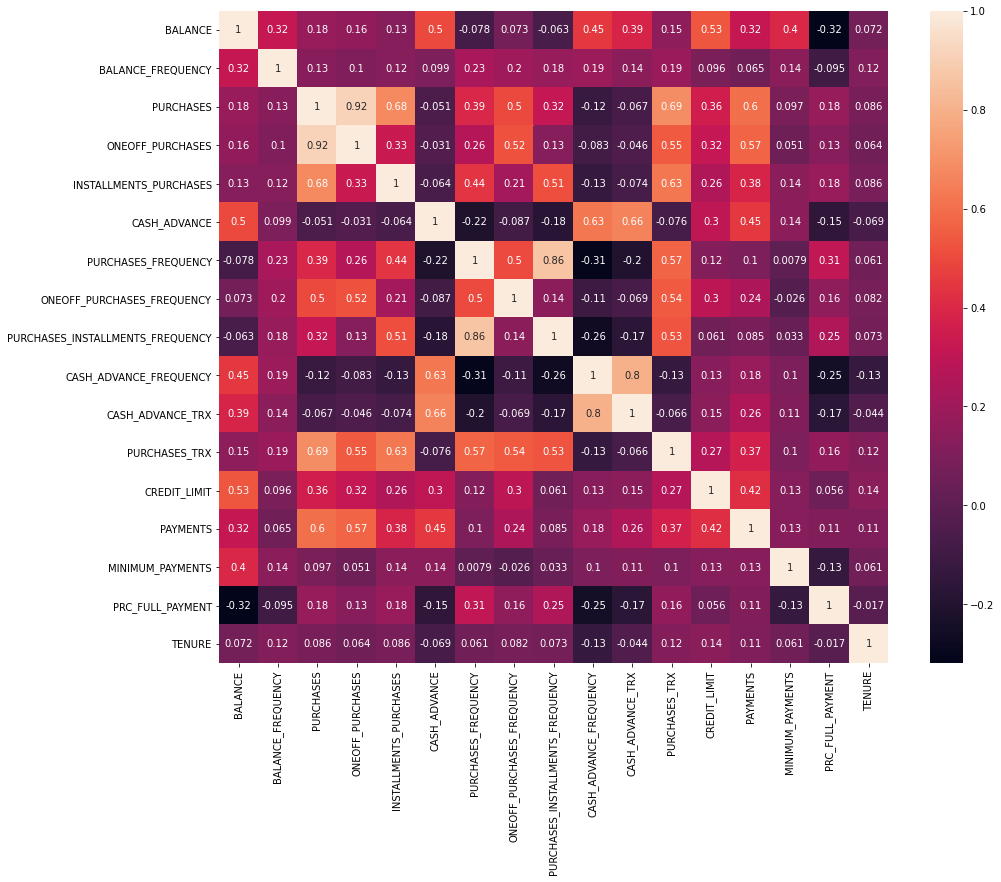

In [15]:
plt.figure(figsize=[15,12])
sns.heatmap(df.corr(),annot= True)
plt.show()


#### Observation:

* Anything above 0.5 is considered as highly correlated. We can observe Multicolinearity b/w the independent features
* Features such as Cash_advance, Cash advance_trx, cash_advance_frequency, balance are highly correlated with each other.
* Features such as Purchases_TRX, Purchase_Installment_Frequency,purchase_Frequency,One_off_purchase_frequency are also highly correlated each other.

* There are other features also which are correlated with each other


### Standardizing the Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
feature= df.columns
sc= StandardScaler()
sc_df= pd.DataFrame(sc.fit_transform(df),columns= feature)
sc_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297334,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088524,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357057,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541


### Applying Different Clusterring Methods

* K-Means Clustering
* Silhoute- Coffeceint
* Agglomerative Clustering




### K-means Implementation

A common challenge with k-means is that you must tell it how many clusters you expect. Figuring out how many clusters we need is not obvious from data, thus we will try different clusters numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). The [elbow](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_elbow_method) method can be used to determine the number of clusters as well.

**Note:** K-means is sensitive to initializations because those initializations are critical to quality of optima found. Thus, we will use smart initialization called ***k-means++***.

In [18]:
from sklearn.cluster import KMeans 

In [19]:
cluster_range= range(1,15)
wcss= []
for num_clusters in cluster_range:
    clusters= KMeans(num_clusters,n_init=15,random_state=20)
    clusters.fit(sc_df)
    labels= clusters.labels_
    centroids= clusters.cluster_centers_
    wcss.append(clusters.inertia_)
cluster_df= pd.DataFrame({"num_clusters":cluster_range,"wcss":wcss})

In [20]:
cluster_df

,num_clusters,wcss
0,1,152133.000000
1,2,127772.255702
2,3,111956.324660
3,4,99048.208723
4,5,91477.538391
5,6,84804.800960
6,7,79481.331561
7,8,74458.764323
8,9,69822.149038
9,10,66430.090404


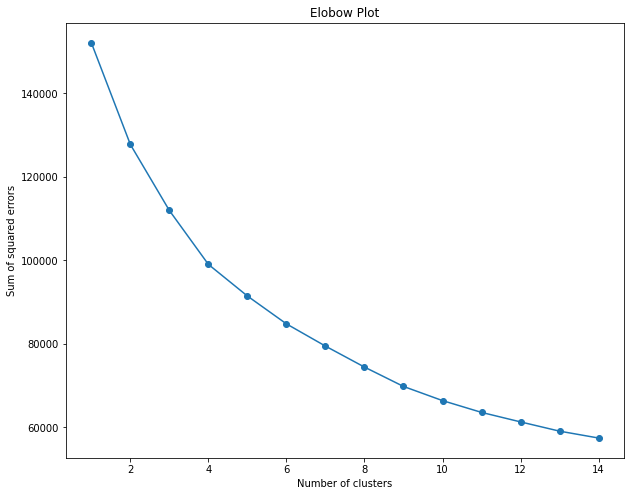

In [21]:
## Elbow Method
plt.figure(figsize=[10,8])
plt.plot(cluster_df.num_clusters,cluster_df.wcss,marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared errors")
plt.title("Elobow Plot")
plt.show()

#### Observation: 

* Total Sum of Squared distances of every data point from respective centeroid is also known as Inertia.From above we can observe that at k=4 inertia stop to drop significantly. Thus we ll be chossing k, number of clusters as 4


In [22]:
kmeans= KMeans(n_clusters=4,n_init=100,init="k-means++",random_state=20)
kmeans= kmeans.fit(sc_df)
labels= kmeans.predict(sc_df)
centroids= kmeans.cluster_centers_
pd.DataFrame(centroids,columns= sc_df.columns)



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.954378,0.462565,3.125656,2.713079,2.406312,-0.155125,1.136232,1.798523,1.065806,-0.319061,-0.170487,3.003076,1.429802,1.918961,0.486479,0.454626,0.323969
1,-0.265030,-0.368337,-0.343084,-0.230400,-0.387729,-0.182059,-0.797618,-0.389293,-0.714129,-0.101203,-0.164530,-0.474853,-0.334244,-0.261833,-0.127762,-0.258909,-0.052248
2,-0.321830,0.242265,0.109026,0.000899,0.255912,-0.366757,0.983835,0.317197,0.874248,-0.462988,-0.360462,0.296945,-0.077072,-0.138864,-0.085734,0.395156,0.057244
3,1.459452,0.384478,-0.234696,-0.164057,-0.253619,1.689223,-0.504746,-0.213086,-0.449910,1.747197,1.618530,-0.283445,0.838702,0.604737,0.499350,-0.406310,-0.098077


In [23]:
prediction= kmeans.predict(sc_df)
k_df= df.copy(deep= True)


In [24]:
k_df["group"]= prediction

In [25]:
k_df["group"].value_counts()

1    3977
2    3366
3    1197
0     409
Name: group, dtype: int64

## Silhoute Coffecient

* Silhoute coffecient is another strategy to find optimal number of clusters. the formula for silhoute is:(B-A)/max(B,A). where B is the avg distance of the points from all points in the nearest clster, and  is avg distance of points from all points in same cluster. the value ranges from -1 to 1. Higher the value,better is number of clusters.

In [26]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X= sc_df.values
range_n_clusters=[2,3,4,5,6]
for n_clusters in range_n_clusters:
        clusterer= KMeans(n_clusters= n_clusters, random_state=20)
        cluster_labels= clusterer.fit_predict(X)
        silhoutte_avg= silhouette_score(X,cluster_labels)
        print("For n_clusters=",n_clusters,
              "the average silhoute_score is:",silhoutte_avg)
        sample_silhoutte_values= silhouette_samples(X,cluster_labels)

Automatically created module for IPython interactive environment
For n_clusters= 2 the average silhoute_score is: 0.2098777320004968
For n_clusters= 3 the average silhoute_score is: 0.2502751305116549
For n_clusters= 4 the average silhoute_score is: 0.19786417575953785
For n_clusters= 5 the average silhoute_score is: 0.19326388588004403
For n_clusters= 6 the average silhoute_score is: 0.2029298106970937


#### Observation:

* For silhoute the avg score is highest at cluster 3. Thus we can say that from silhoute coffecient method we are getting 3 clsuters for the Credit Card Dataset.

## Agglomerative Hierarchical Clustering:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

* In the agglomerative hierarchical approach, we define each data point as a cluster and combine existing clusters at each step. Below are five different methods for this approach:



- Single Linkage: In single linkage, we define the distance between two clusters as the minimum distance between any single data point in the first cluster and any single data point in the second cluster. On the basis of this definition of distance between clusters, at each stage of the process we combine the two clusters with the smallest single linkage distance.

* Complete Linkage: In complete linkage, we define the distance between two clusters to be the maximum distance between any single data point in the first cluster and any single data point in the second cluster. On the basis of this definition of distance between clusters, at each stage of the process we combine the two clusters that have the smallestcomplete linkage distance.

* Average Linkage: In average linkage, we define the distance between two clusters to be the average distance between data points in the first cluster and data points in the second cluster. On the basis of this definition of distance between clusters, at each stage of the process we combine the two clusters that have the smallest average linkage distance.

* Centroid Method: In centroid method, the distance between two clusters is the distance between the two mean vectors of the clusters. At each stage of the process we combine the two clusters that have the smallest centroid distance.

* Ward’s Method: This method does not directly define a measure of distance between two points or clusters. It is an ANOVA based approach. One-way univariate ANOVAs are done for each variable with groups defined by the clusters at that stage of the process. At each stage, two clusters merge that provide the smallest increase in the combined error sum of squares.

##### Trying with different Linkage Methods. Cophenet distance correlation Coffecient helps in deciding which linkage method should be beneficial for the dataset. The higher the coffecient, better it is

In [27]:

from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from scipy.spatial.distance import pdist



merg1= linkage(sc_df,method="single")
c,cophenet_dist= cophenet(merg1,pdist(sc_df))
print("Single Linkage",c)

merg2= linkage(sc_df,method="complete")
c,cophenet_dist= cophenet(merg2,pdist(sc_df))
print("Complete Linkage",c)

merg3= linkage(sc_df,method="average")
c,cophenet_dist= cophenet(merg3,pdist(sc_df))
print("Average Linkage",c)

merg4= linkage(sc_df,method="ward")
c,cophenet_dist= cophenet(merg4,pdist(sc_df))
print("Ward Linkage",c)

merg5= linkage(sc_df,method="centroid")
c,cophenet_dist= cophenet(merg5,pdist(sc_df))
print("Centroid Linkage",c)

# From above we can observe that "Average Linkage Method" gives the highest cophent distance

Single Linkage 0.8445687261633128
Complete Linkage 0.775837698899199
Average Linkage 0.8876274263059093
Ward Linkage 0.3300119762607677
Centroid Linkage 0.8660516759862555


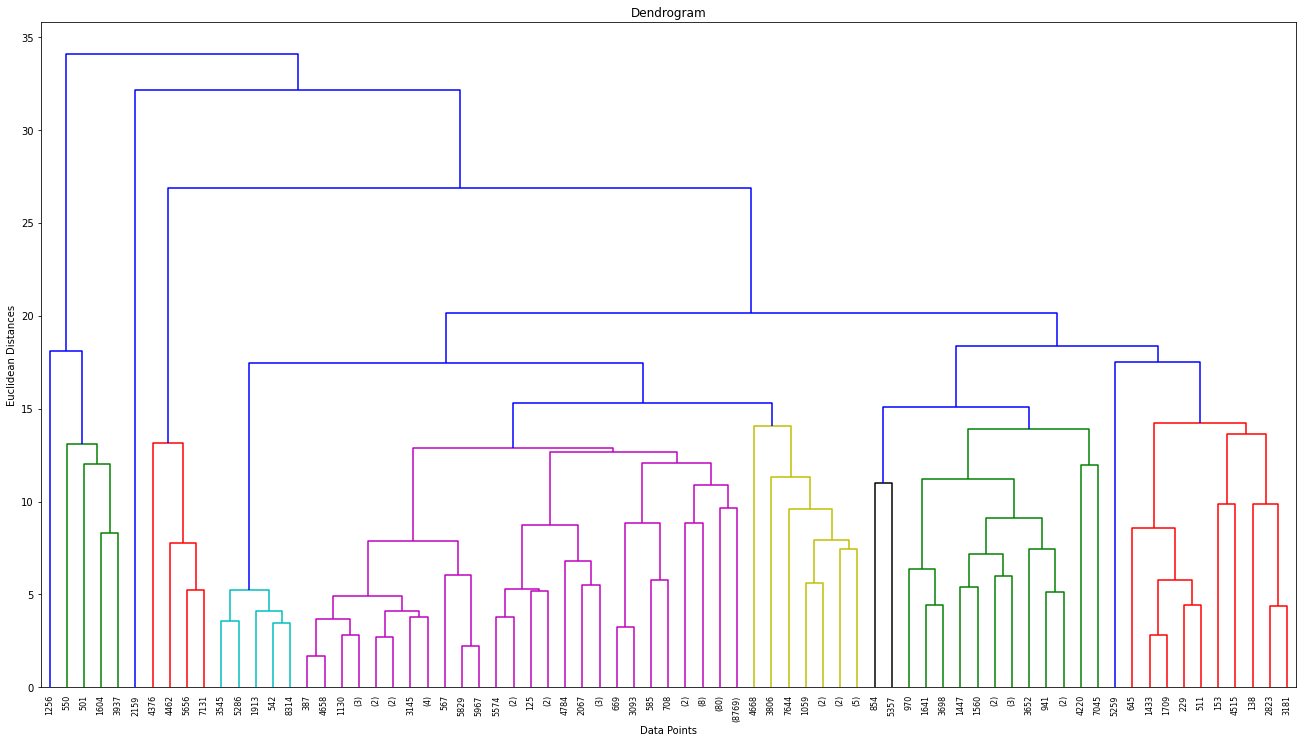

In [28]:
plt.figure(figsize=(18,10))
dendrogram(merg3, leaf_rotation=90.0,color_threshold=15,leaf_font_size=8,truncate_mode='level',p=10)
plt.tight_layout()
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
hie=hie_clus.fit(sc_df)
cluster2 = hie.fit_predict(sc_df)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

In [30]:
df_h['label'].value_counts()

0    8939
1       5
3       4
2       1
Name: label, dtype: int64

#### Observation:

* From above groups, we can observe that its highly imbalanced. Thus we need to change the linkage method. Though Average linkage was giving the highest cophonet distance.However the groups are not balanced. Therefore trying the ward method.

### Ward Linkage Method

In [31]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hie=hie_clus.fit(sc_df)
cluster2 = hie.fit_predict(sc_df)

df_h = df.copy(deep=True)
df_h['group'] = cluster2

In [32]:
df_h['group'].value_counts()

1    4668
0    2858
2    1400
3      23
Name: group, dtype: int64

### Comparing the results of clusters obtained from K-Means & Agglomerative

* Boxplot for any one feature with the labels of Kmeans Clustering
* Boxplot for any one feature with the labels of hierarchical Clustering

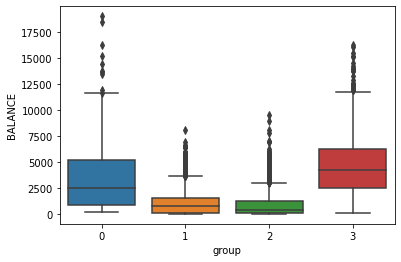

In [33]:
sns.boxplot(x="group",y="BALANCE",data= k_df)
plt.show()

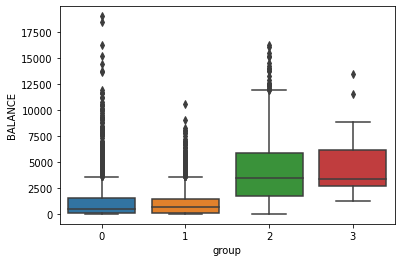

In [34]:
sns.boxplot(x="group",y="BALANCE",data= df_h)
plt.show()

* From above we can get a rough idea of the clsuters obtained from both the methods.
* For instance 3 class of K-Means represent the class 2 of Agglomerative Clustering, as the Balance for both the groups obtained lies approximately in same range. Similarly it can be said that class2 of K-Means is almost same as Class 0 of Agglomerative.

## PCA

* Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning. High dimensionality means that the dataset has a large number of features. The primary problem associated with high-dimensionality in the machine learning field is model overfitting, which reduces the ability to generalize beyond the examples in the training set

* The ability to generalize correctly becomes exponentially harder as the dimensionality of the training dataset grows, as the training set covers a dwindling fraction of the input space. Models also become more efficient as the reduced feature set boosts learning rates and diminishes computation costs by removing redundant features.

* PCA Technique also helps in reducing the multicolinearity among the independent features.

In [35]:
from sklearn.decomposition import PCA

* Apply PCA on the above dataset and determine the number of PCA components to be used so that 90% of the variance in data is explained by the same.

In [36]:
# First including all the components
m= PCA(n_components=17)
pca_val17= m.fit_transform(sc_df)

In [37]:
m.explained_variance_   # Eigen values

array([4.64139913e+00, 3.45485163e+00, 1.50034511e+00, 1.27173136e+00,
       1.05498082e+00, 9.74671991e-01, 8.30030707e-01, 7.35090867e-01,
       6.42874943e-01, 5.23673923e-01, 4.03381860e-01, 3.01515448e-01,
       2.42931988e-01, 2.06851672e-01, 1.72151812e-01, 4.54049545e-02,
       1.16504318e-05])

In [38]:
m.explained_variance_ratio_

array([2.72992970e-01, 2.03203857e-01, 8.82457327e-02, 7.47993677e-02,
       6.20507608e-02, 5.73272398e-02, 4.88198797e-02, 4.32358073e-02,
       3.78119474e-02, 3.08009062e-02, 2.37256932e-02, 1.77342209e-02,
       1.42885201e-02, 1.21663857e-02, 1.01254456e-02, 2.67058122e-03,
       6.85242934e-07])

In [39]:
m.components_   # Eigen vectors

array([[ 1.02000932e-01,  1.20594644e-01,  4.11549733e-01,
         3.46319771e-01,  3.36753800e-01, -2.26035296e-02,
         3.21100717e-01,  2.94422867e-01,  2.74383848e-01,
        -8.83316382e-02, -4.79344181e-02,  3.90570308e-01,
         2.12009392e-01,  2.66581740e-01,  6.48197419e-02,
         1.31694774e-01,  8.09127408e-02],
       [ 4.03748004e-01,  1.31839304e-01,  3.95669311e-02,
         6.14848687e-02, -1.94628260e-02,  4.38898241e-01,
        -1.91323665e-01, -1.88424212e-02, -1.78993278e-01,
         4.34137563e-01,  4.19579964e-01, -2.05131006e-02,
         2.37707965e-01,  2.56359038e-01,  1.70120868e-01,
        -1.90059446e-01, -4.34511166e-03],
       [-1.62168027e-01, -4.24260266e-01,  2.57088808e-01,
         3.90113099e-01, -1.08739413e-01, -2.10028955e-02,
        -3.69785700e-01,  1.15725141e-01, -4.67672059e-01,
        -1.02757687e-01, -1.07814586e-01, -7.53117806e-02,
         1.01091837e-01,  2.77904956e-01, -2.41205873e-01,
         1.27113135e-01, -6.8

In [40]:
tot= sum(m.explained_variance_ratio_)
np.cumsum(m.explained_variance_ratio_/tot*100)

array([ 27.29929697,  47.61968265,  56.44425592,  63.92419269,
        70.12926876,  75.86199275,  80.74398072,  85.06756145,
        88.84875619,  91.92884681,  94.30141613,  96.07483821,
        97.50369022,  98.7203288 ,  99.73287335,  99.99993148,
       100.        ])

#### Observation:

* From here we can conclude that 10 PCA Components are explaining 90% of varaince

### Build K-Mean with only 10 pca_components

In [41]:
m10= PCA(n_components= 10)
pca_val10= m10.fit_transform(sc_df)

In [42]:
pca_df= pd.DataFrame(pca_val10)

In [43]:
cluster_range= range(1,15)
wcss= []
for num_clusters in cluster_range:
    clusters= KMeans(num_clusters,n_init=15,random_state=20)
    clusters.fit(pca_df)
    labels= clusters.labels_
    centroids= clusters.cluster_centers_
    wcss.append(clusters.inertia_)
cluster_df= pd.DataFrame({"num_clusters":cluster_range,"wcss":wcss})

In [44]:
cluster_df

,num_clusters,wcss
0,1,139854.112516
1,2,115518.959743
2,3,99786.475870
3,4,86957.642351
4,5,79568.626645
5,6,72921.729307
6,7,67582.637470
7,8,63032.873029
8,9,58456.786911
9,10,55300.066065


In [45]:
kmeans= KMeans(n_clusters=4,n_init=100,init="k-means++",random_state=20)
kmeans= kmeans.fit(pca_df)
labels= kmeans.predict(pca_df)
centroids= kmeans.cluster_centers_
kmeans.inertia_



86954.87015474914

In [46]:
prediction= kmeans.predict(pca_df)
k_df_pca= pca_df.copy(deep=True)
k_df_pca["group"]= prediction

In [47]:
k_df_pca["group"].value_counts()  

0    4017
1    3350
3    1191
2     391
Name: group, dtype: int64

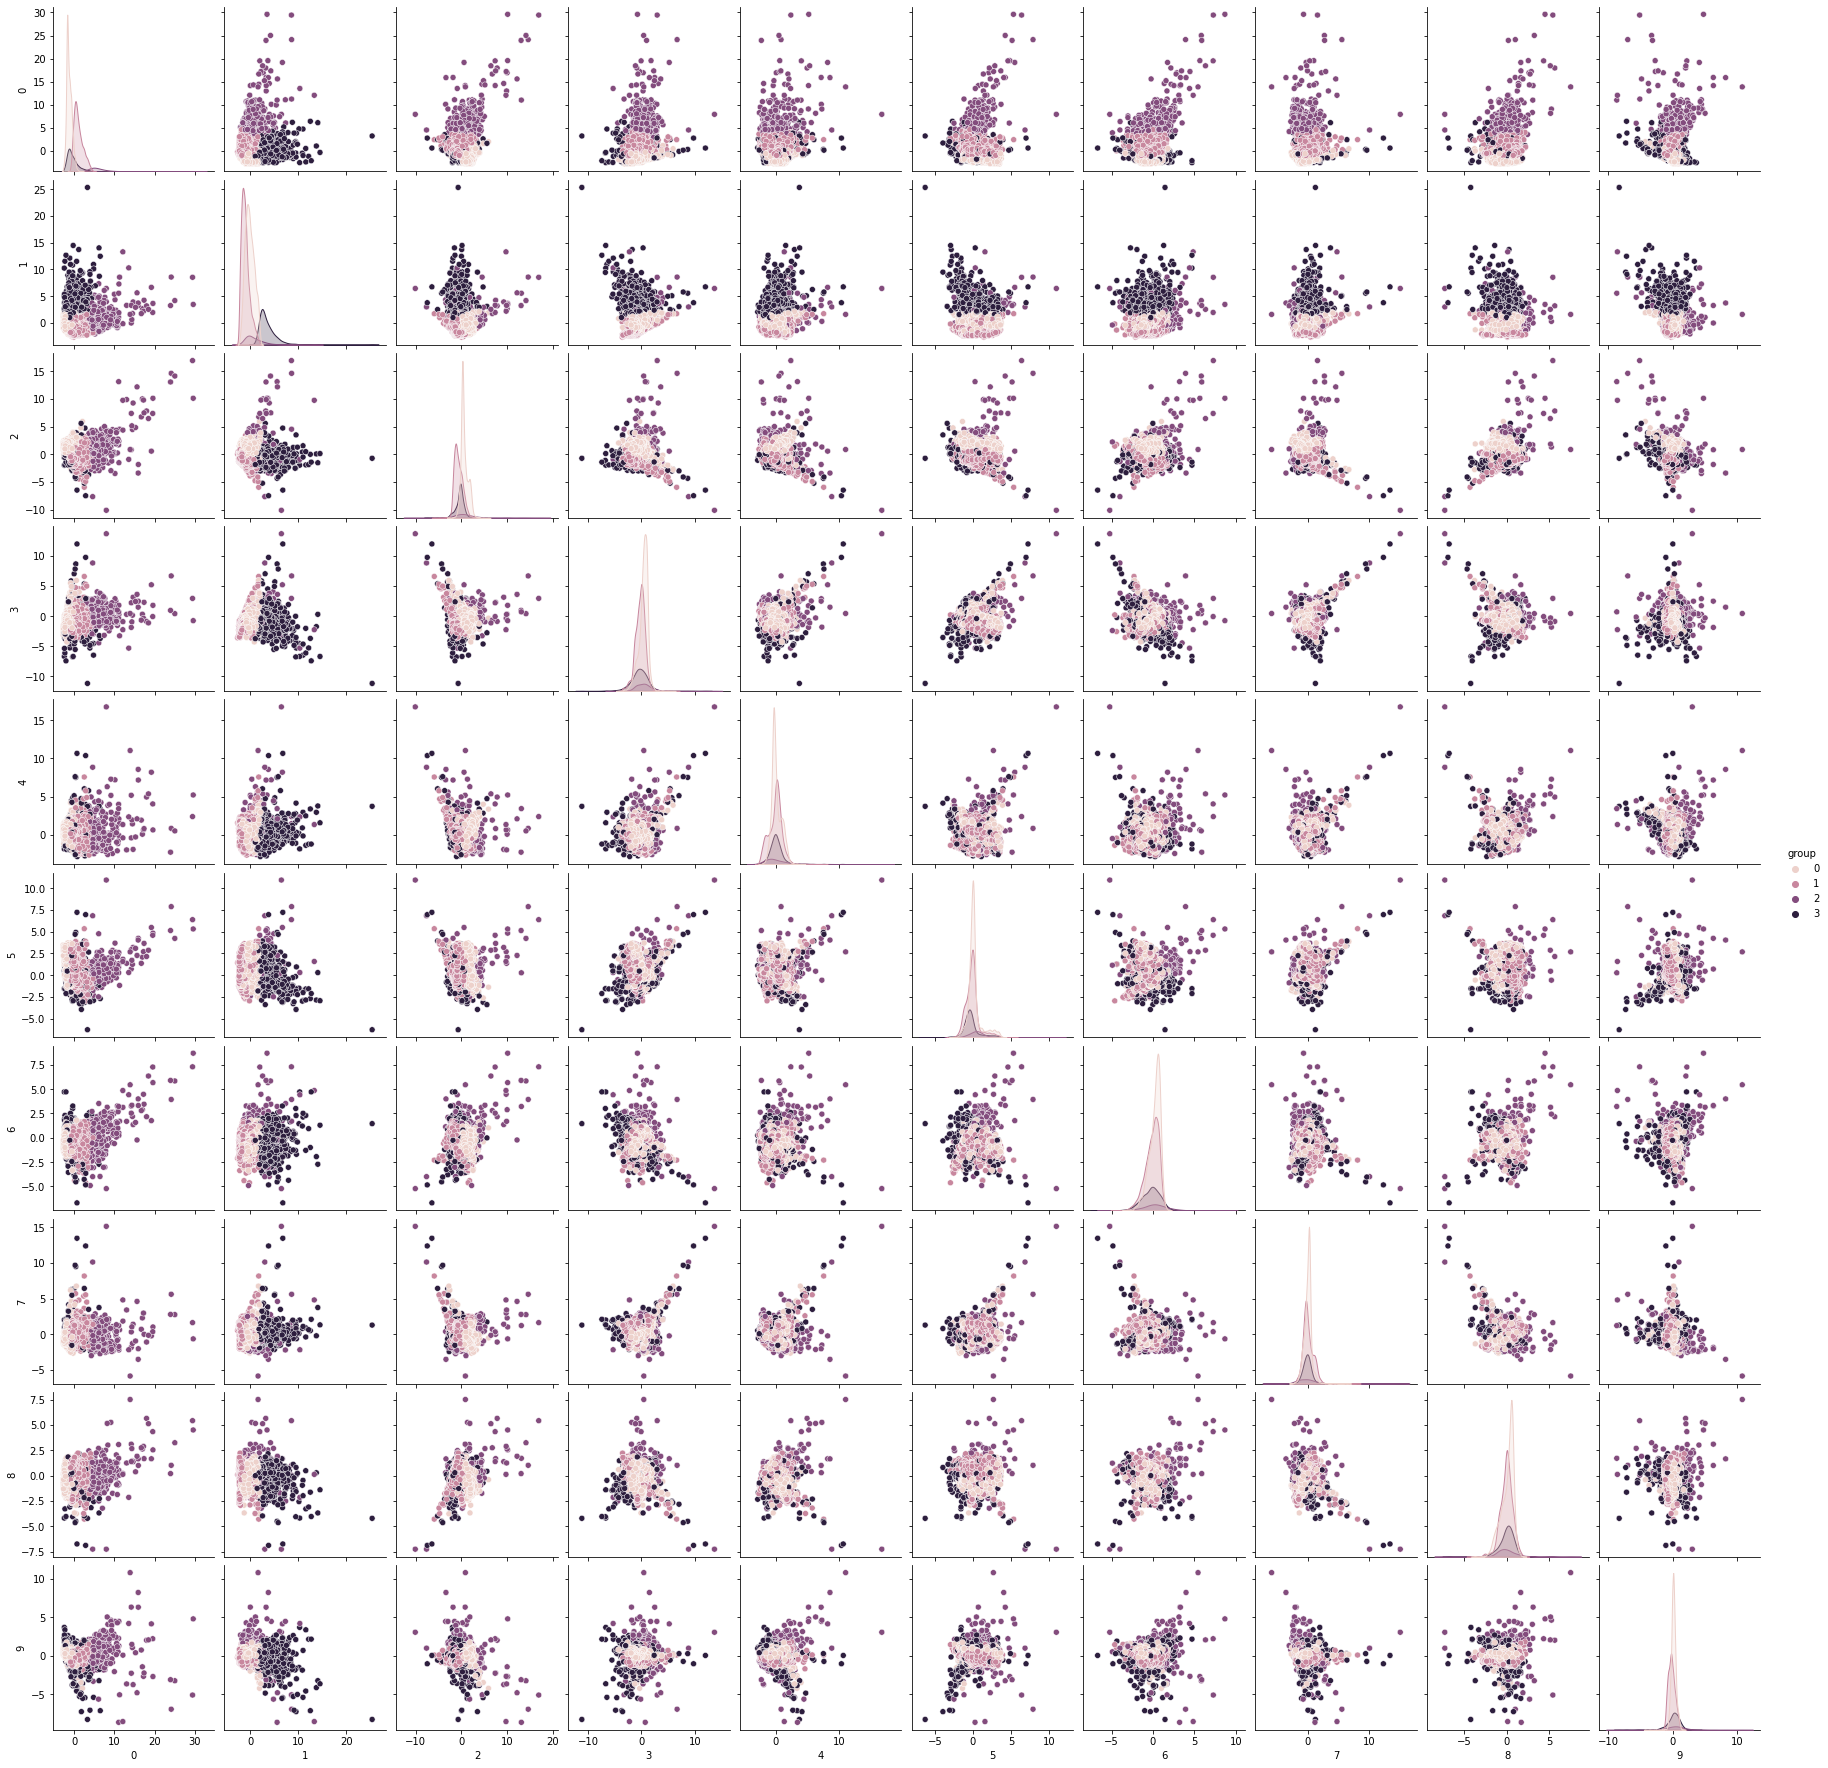

In [48]:
sns.pairplot(k_df_pca,diag_kind="kde",hue="group")

#### Observation:

* It shows that first two components are able to indentify clusters

In [49]:
k_df["group"].value_counts()  # Full data clusters

1    3977
2    3366
3    1197
0     409
Name: group, dtype: int64

#### Observation:

* Using only 10 PCA Components we have obtained the same distribution of clusters as we got earlier using the entire dataset.

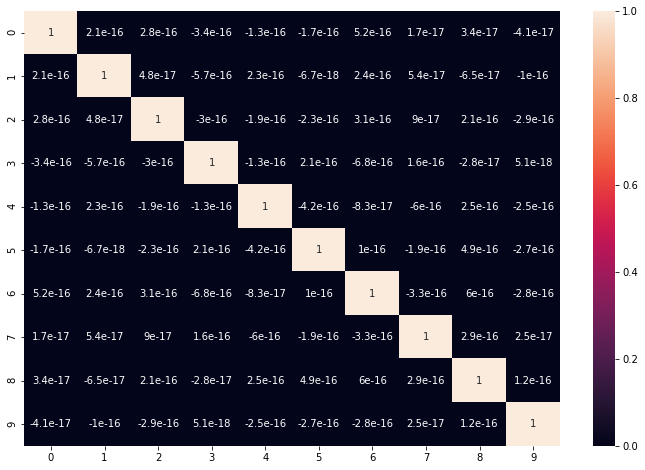

In [50]:
### Checking Multicolinearity 
plt.figure(figsize=[12,8])

sns.heatmap(pca_df.corr(),annot= True)
plt.show()

* There is no multicolinearity present in the PCA Dataset with 10 components

#### Interpreting the Clusters

In [51]:
# Considering only few columns to understand the clusters.
k_df_columns= ["PURCHASES","CASH_ADVANCE","PURCHASES_TRX","CASH_ADVANCE_TRX","MINIMUM_PAYMENTS","CREDIT_LIMIT",
                   "ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"]

In [52]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=k_df.groupby('group').apply(lambda x: x[k_df_columns].mean()).T
cluster_4

group,0,1,2,3
PURCHASES,7681.620098,270.281184,1236.263333,501.862982
CASH_ADVANCE,653.638891,597.154288,209.816318,4521.509581
PURCHASES_TRX,89.359413,2.907971,22.092692,7.665831
CASH_ADVANCE_TRX,2.085575,2.126226,0.789067,14.294904
MINIMUM_PAYMENTS,1970.476256,535.626389,633.801648,2000.543192
CREDIT_LIMIT,9696.943765,3278.263348,4214.013741,7546.160857
ONEOFF_PURCHASES,5095.878826,210.068828,593.995933,320.188797
INSTALLMENTS_PURCHASES,2587.208264,60.479311,642.541696,181.759123


In [53]:
# Percentage of each cluster in the total customer base
s=k_df.groupby('group').apply(lambda x: x['group'].value_counts())
print (s),'\n'

per=pd.Series((s.values.astype('float')/ k_df.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

group   
0      0     409
1      1    3977
2      2    3366
3      3    1197
Name: group, dtype: int64
Cluster -4 
   Size  Percentage
0   409    4.570343
1  3977   44.440720
2  3366   37.613141
3  1197   13.375796


#### Insights

* Clusters are clearly distinguishing behavior within customers

* Cluster 0 is the group of customers who have highest Average purchases and doing both installment as well as one_off purchases, have comparatively good credit limit. This group is about 4% of the total customer base.

* Cluster 3 is taking maximum advance_cash and is paying highest minimum payment. Purchases made by this group is comparative less than 0 and 2 group. This group is about 13% of the total customer base.

* Cluster 1 customers are doing minimum one off purchases and installment purchases, have the least credit limit. This group is about 44% of the total customer base

* Cluster 2 customers are doing second highest purchases, having the least cash_advance balance. The credit limit is also low in comparision to cluster 0 & 3 customers.This group is about 37% of the total customer base

#### Inference:

* Segmentation in marketing is a technique used to divide customers or other entities into groups based on attributes such as behaviour or demographics. It is useful to identify segments of customers.Thus based on different behaviourial attributes for credit card customers, the above clusters obtained can be used by  banks to segment the customers in different groups.Important factors such as average purchases, cash advance, credit limit of customers in different groups will be benefecial in order to segment the customers.